In [122]:
# Imports
import pandas as pd
import numpy as np

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import matplotlib.pyplot as plt

# Scenario discovery of the selected policies 
In this notebook the alternatives selected in the MORDM_generate_alternatives.ipynb notebook are evaluated on their performance in different scenarios. This will be done using the following steps: 

- Look at cases of interest, this will be the cases in which the amount of Damage in Dike Ring 4 is not equal to zero, if this leads to not enough interesting cases another requirement will be added to take other actors in consideration as well. 
- Do a PRIM Analysis of the cases of interest


The policies that are used in this file have different numbers in the MORDM_Generating_aternatives file. The policies are defined as followed

| MORDM_Alternatives file | Current file |
|-------------------------|--------------|
| 15                      | 0            |
| 64                      | 1            |
| 170                     | 2            |
| 1881                    | 3            |


In [123]:
# Getting the results from the MOEA analysis
experiments = pd.read_csv('data/output/MOEA_test_experiments.csv')
outcomes = pd.read_csv('data/output/MOEA_test_outcomes.csv')

In [124]:
# Adding the columns for total dike investment costs and total damage in other dike rings
outcomes['Total Damage Other Dike Rings'] = (
    outcomes['A.1_Expected Annual Damage'] +
    outcomes['A.2_Expected Annual Damage'] +
    outcomes['A.3_Expected Annual Damage'] +
    outcomes['A.5_Expected Annual Damage']
)

outcomes['Total Dike Investment Costs'] = (
    outcomes['A.1_Dike Investment Costs'] +
    outcomes['A.2_Dike Investment Costs'] +
    outcomes['A.3_Dike Investment Costs'] +
    outcomes['A.4_Dike Investment Costs'] +
    outcomes['A.5_Dike Investment Costs']
)


After the dataframes are transformed for the anaylisis some small checks where executed to see in how many cases the requirement of having 0 annual damage in dike ring 4 and/or zero damage in other dike rings was met.

In [125]:
outcomes[outcomes['A.4_Expected Annual Damage']!= 0].describe()

,Unnamed: 0,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,...,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy,Total Damage Other Dike Rings,Total Dike Investment Costs
count,37.000000,37.0,3.700000e+01,37.0,3.700000e+01,3.700000e+01,37.000000,3.700000e+01,3.700000e+01,37.000000,...,3.700000e+01,37.000000,37.0,3.700000e+01,37.0,3.700000e+01,37.000000,37.000000,3.700000e+01,3.700000e+01
mean,15582.594595,0.0,1.773938e+08,0.0,2.168177e+07,1.792996e+08,0.006404,1.743037e+05,1.040813e+08,0.000056,...,3.256164e+07,0.000414,0.0,1.370721e+08,0.0,1.591373e+09,712.939103,1.216216,2.185608e+07,6.304084e+08
std,11828.200393,0.0,7.670804e+07,0.0,7.804749e+07,3.542941e+07,0.022238,1.060248e+06,3.738271e+07,0.000342,...,1.714699e+07,0.001159,0.0,3.017528e+07,0.0,2.898535e+08,2020.896867,1.157947,7.800491e+07,1.099852e+08
min,283.000000,0.0,7.643154e+07,0.0,0.000000e+00,1.492618e+08,0.000000,0.000000e+00,4.804784e+07,0.000000,...,2.038434e+07,0.000003,0.0,9.213410e+07,0.0,1.256900e+09,2.472630,0.000000,0.000000e+00,4.497835e+08
25%,2912.000000,0.0,1.144981e+08,0.0,0.000000e+00,1.492618e+08,0.000000,0.000000e+00,5.934443e+07,0.000000,...,2.038434e+07,0.000022,0.0,1.113913e+08,0.0,1.408800e+09,19.293412,0.000000,0.000000e+00,5.673186e+08
50%,12912.000000,0.0,1.363436e+08,0.0,0.000000e+00,1.571064e+08,0.000000,0.000000e+00,1.034037e+08,0.000000,...,2.806514e+07,0.000085,0.0,1.280663e+08,0.0,1.474700e+09,43.279280,1.000000,2.269775e+05,5.971590e+08
75%,22912.000000,0.0,2.663095e+08,0.0,6.468345e+06,2.012802e+08,0.001101,0.000000e+00,1.419040e+08,0.000000,...,3.799706e+07,0.000193,0.0,1.702117e+08,0.0,2.015900e+09,510.140030,2.000000,6.468345e+06,7.480713e+08
max,39508.000000,0.0,2.663095e+08,0.0,4.565950e+08,2.476880e+08,0.128975,6.449236e+06,1.419040e+08,0.002081,...,7.246333e+07,0.006376,0.0,1.702117e+08,0.0,2.015900e+09,11849.263518,3.000000,4.565950e+08,7.480713e+08


### Outcomes
Only 37 out of 40,000 outcomes do not meet the requirement of having 0 annual damage in dike ring 4. This makes sense because the policies were selected to focus on this requirement. One takeaway from this is that the selected policies are very robust in terms of this requirement. However, it is also an indication that the requirements might be a little too shallow to make a nuanced policy. That is why it is also useful to look at the second requirement of having 0 damage in the other dike rings.


In [126]:
# Filter outcomes where the sum of 'A.4_Expected Annual Damage' and 'Total Damage Other Dike Rings' is not equal to 0
outcomes[(outcomes['A.4_Expected Annual Damage'] + outcomes['Total Damage Other Dike Rings']) != 0]


,Unnamed: 0,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,...,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy,Total Damage Other Dike Rings,Total Dike Investment Costs
0,0,0.0,2.663095e+08,0.0,4.719043e+06,1.492618e+08,0.001791,0.000000e+00,1.419040e+08,0.000000,...,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,133.538159,0,4.719043e+06,7.480713e+08
1,1,0.0,2.663095e+08,0.0,5.148331e+06,1.492618e+08,0.001808,0.000000e+00,1.419040e+08,0.000000,...,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,134.023292,0,5.148331e+06,7.480713e+08
3,3,0.0,2.663095e+08,0.0,1.043934e+07,1.492618e+08,0.003570,0.000000e+00,1.419040e+08,0.000000,...,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,274.011706,0,1.043934e+07,7.480713e+08
4,4,0.0,2.663095e+08,0.0,2.147961e+06,1.492618e+08,0.000751,0.000000e+00,1.419040e+08,0.000000,...,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,55.986516,0,2.147961e+06,7.480713e+08
5,5,0.0,2.663095e+08,0.0,4.273933e+05,1.492618e+08,0.000203,0.000000e+00,1.419040e+08,0.000000,...,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,14.933021,0,4.273933e+05,7.480713e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,39994,0.0,1.144981e+08,0.0,5.351224e+06,1.571064e+08,0.000916,4.767775e+07,4.804784e+07,0.010131,...,3.799706e+07,0.0,0.0,9.213410e+07,0.0,1.256900e+09,2572.129385,3,5.302897e+07,4.497835e+08
39996,39996,0.0,1.144981e+08,0.0,1.270757e+07,1.571064e+08,0.001396,0.000000e+00,4.804784e+07,0.000000,...,3.799706e+07,0.0,0.0,9.213410e+07,0.0,1.256900e+09,673.148358,3,1.270757e+07,4.497835e+08
39997,39997,0.0,1.144981e+08,0.0,7.245747e+07,1.571064e+08,0.010469,0.000000e+00,4.804784e+07,0.000000,...,3.799706e+07,0.0,0.0,9.213410e+07,0.0,1.256900e+09,5512.402026,3,7.245747e+07,4.497835e+08
39998,39998,0.0,1.144981e+08,0.0,1.412280e+06,1.571064e+08,0.000122,0.000000e+00,4.804784e+07,0.000000,...,3.799706e+07,0.0,0.0,9.213410e+07,0.0,1.256900e+09,57.267915,3,1.412280e+06,4.497835e+08


Almost half of the policies do not meet this requirement, out of this it can be concluded that in many policies at least one dike ring will overflow. 

In [127]:
# Define a list of uncertainties in the model
list_of_uncertainties = [
    'discount rate 0', 'discount rate 1', 'discount rate 2', 'A.0_ID flood wave shape',
    'A.1_Bmax', 'A.1_pfail', 'A.1_Brate',
    'A.2_Bmax', 'A.2_pfail', 'A.2_Brate',
    'A.3_Bmax', 'A.3_pfail', 'A.3_Brate',
    'A.4_Bmax', 'A.4_pfail', 'A.4_Brate',
    'A.5_Bmax', 'A.5_pfail', 'A.5_Brate'
]

# Extract the relevant uncertainty experiments
uncertainty_experiments = experiments[list_of_uncertainties]

### PRIM

In the context of scenario discovery for evaluating the selected policies' performance, PRIM (Patient Rule Induction Method) is an essential analytical tool. 
This section starts by looking at the predefined requirement(Damage in dike ring 4 !=0) however, this only appears in 37 out of 40.000 scenarios. This amount is so small that A prim analysis will most likely not lead to any usefull insights(except that the selected policies are very robust when it comes to this requirement. However, the selected policy still has to get support from other important actors that is why the robusteness of the damage of other dike rings is of importance ass well. That is why this section contains three sub-sections. 

- PRIM analysis of damage in dike-ring 4
- PRIM analysis of damage in other dike rings 

[MainProcess/INFO] 40000 points remaining, containing 37 cases of interest
C:\Users\samuf\anaconda3\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '118.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
[MainProcess/INFO] box mean (0.017891682785299807) does not meet threshold criteria (1 0.6),returning dump box


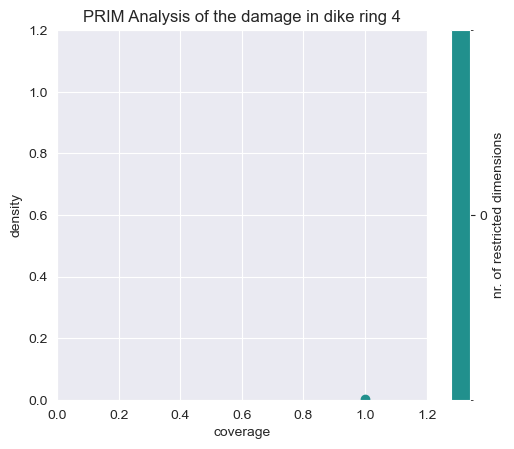

In [128]:
# Define the input data for PRIM analysis
x = uncertainty_experiments
y = outcomes['A.4_Expected Annual Damage'].values > np.percentile(
    outcomes['A.4_Expected Annual Damage'].values, 90#since the amount of cases in which there is even any damage so low, 
    ## it does not really matter how high the threshold is
)

# Apply PRIM to identify regions in the uncertainty space with high total damage in other dike rings
prim_alg = prim.Prim(x, y, threshold=0.6, peel_alpha=0.1)
box1 = prim_alg.find_box()

# Show the tradeoff between coverage and density
box1.show_tradeoff()
plt.title("PRIM Analysis of the damage in dike ring 4")
plt.show()

In [129]:
# Inspect box 0 of the PRIM algorithm results
box1.inspect(0)



coverage        1.000000
density         0.000925
id              0.000000
k              37.000000
mass            1.000000
mean            0.000925
n           40000.000000
res_dim         0.000000
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp value), (box 0, qp value)]
Index: []


[None]


This PRIM shows only 1 clustering with a coverage of 1 and a density of 0.00925(37/10.000) which makes sense since the amount of policies that meet this requirement is so small that it is very likely hard to cluster them. Also since only 0.00925 of the runs have any value at all the percentile size is only of influence in very extreme values
 
The low amount of cases that meet the requirements means that the selected policies almost all perform very well. However, this analysis is still a little bit shallow and should be elaborated by looking at which policies might get more support from other dike ring. The best way to access this is by looking at the damage of other dike rings. which is done in the PRIM analysis below. 

## PRIM analysis of the damage in other dike rings

[MainProcess/INFO] 40000 points remaining, containing 4000 cases of interest
[MainProcess/INFO] mean: 0.6327220077220077, mass: 0.0518, coverage: 0.32775, density: 0.6327220077220077 restricted_dimensions: 1


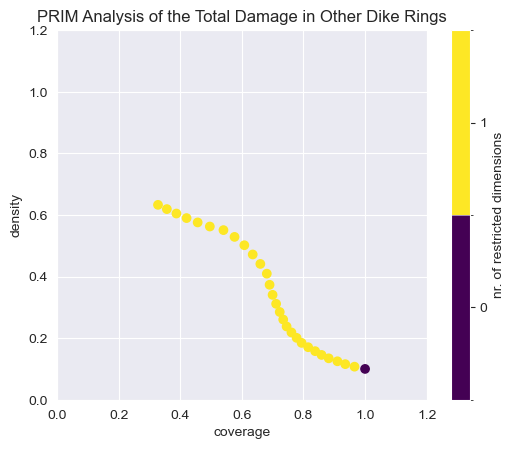

In [130]:
# Define the input data for PRIM analysis
x = uncertainty_experiments
y = outcomes['Total Damage Other Dike Rings'].values > np.percentile(
    outcomes['Total Damage Other Dike Rings'].values, 90
)

# Apply PRIM to identify regions in the uncertainty space with high total damage in other dike rings
prim_alg = prim.Prim(x, y, threshold=0.6, peel_alpha=0.1)
box2 = prim_alg.find_box()

# Show the tradeoff between coverage and density
box2.show_tradeoff()
plt.title("PRIM Analysis of the Total Damage in Other Dike Rings")
plt.show()



coverage        0.910250
density         0.124863
id              3.000000
k            3641.000000
mass            0.729000
mean            0.124863
n           29160.000000
res_dim         1.000000
Name: 3, dtype: float64

              box 3                                 
                min       max qp value      qp value
A.2_pfail  0.000096  0.728997      NaN  7.293610e-43


C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

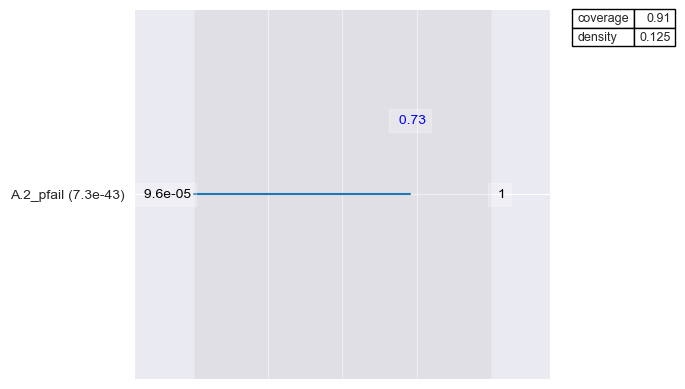

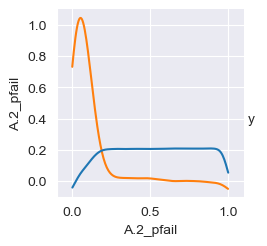

In [131]:
# Inspect box 3 of the PRIM algorithm results
box2.inspect(3)

# Inspect box 3 with a graph-style representation
box2.inspect(3, style="graph")

# Show pairs scatter plot for box 45
box2.show_pairs_scatter(3)

plt.show()  


coverage        0.910250
density         0.124863
id              3.000000
k            3641.000000
mass            0.729000
mean            0.124863
n           29160.000000
res_dim         1.000000
Name: 3, dtype: float64

              box 3                                 
                min       max qp value      qp value
A.2_pfail  0.000096  0.728997      NaN  7.293610e-43


[<Figure size 640x480 with 1 Axes>]

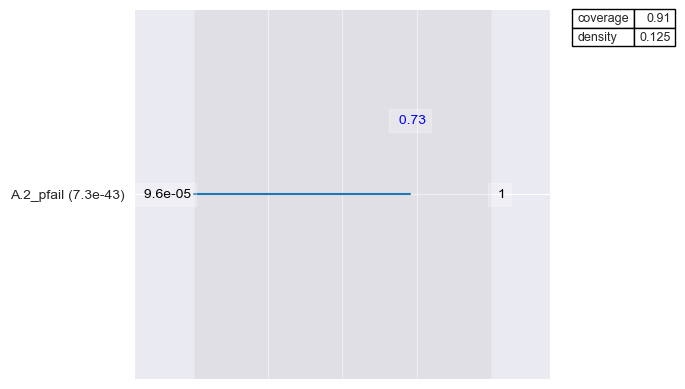

In [132]:
# Inspect box 3 of the PRIM algorithm results
box2.inspect(3)

# Inspect box 3  with a graph-style representation
box2.inspect(3, style="graph")




## key takeaways
The PRIM analysis shows that clustering leads to high coverage and low density. This is an indication that clustering based on specific uncertaintys is hard which makes the chosen policys decently robust. The extremely low amount of scenario's in which there is any damage at all in dike ring 4 means that the selected policies do really good at preventing damage in this specific dike ring. Preventing damage in all dike rings is a lot harder, which makes sense because the amount of uncertainties and their influence increases as more dike rings are considered. 